In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize


In [2]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(43500,140000,3650),
                   np.random.normal(48000,70000,3650)],
                   index = [1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [3]:
avg = df.mean(axis = 1)

<IPython.core.display.Javascript object>


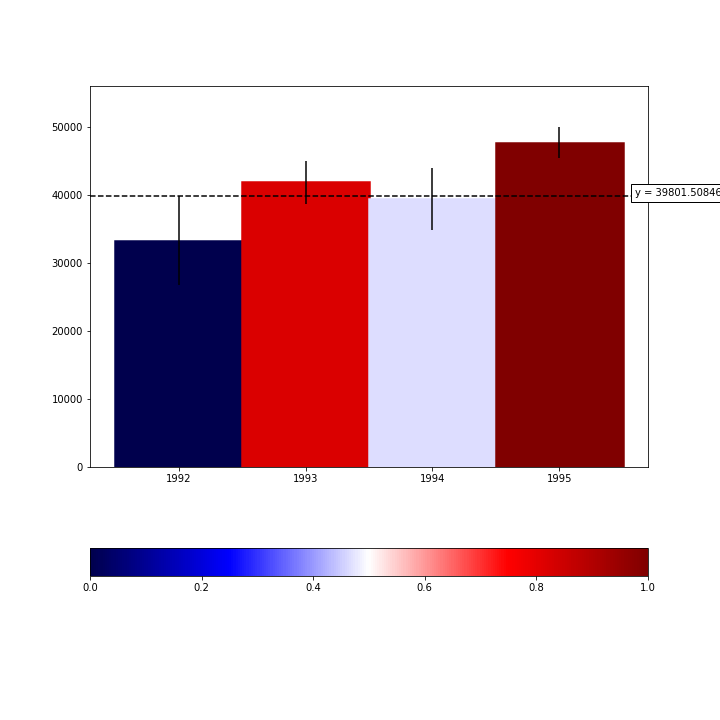

In [34]:
from matplotlib.cm import ScalarMappable
%matplotlib notebook
plt.figure(figsize = [10,10])

#Find standard error of the mean (aka SEM)
st_dev = df.std(axis = 1)
SEM = st_dev/np.sqrt(df.shape[1]) # formula for SEM = (Standard Deviation of a sample)/(Sq. Root of Sample Size)

#Find 95% confidence interval
conf_int = SEM*1.96

# Initialize a value for the horizontal line
y = 30000
#Creating Color Map
norm = Normalize(vmin = -1.96, vmax = 1.96)
cmap = cm.get_cmap('seismic')
colors = pd.DataFrame()
colors['intensity'] = Normalize((avg-y)/SEM) 
colors['color'] = [cmap(x) for x in colors['intensity']]


#Plot Figure
bar_plot = plt.bar(avg.index,avg, width = 1, ec = 'black', lw = 2.5, color = colors['color'], yerr = conf_int)
ax = plt.gca()
ax1 = ax.xaxis
plt.axis([1991.3,1995.7,0, 56000])
plt.xticks (df.index, [1992, 1993,1994,1995])
hoz_line = plt.axhline(y = y,c = 'k',ls = '--')
text_box = plt.text(x = 1995.7, y = y, s = 'y = {}'.format(y), bbox = dict(fc = 'white', ec = 'k'))

def onclick(event):
    for i in range(4):
        shade = cmap(norm((avg.values[i] - event.ydata)/SEM.values[i]))
        bar_plot[i].set_color(shade)
    hoz_line.set_ydata(event.ydata)
    text_box.set_text('y = {}'.format(event.ydata))
    text_box.set_position((1995.6, event.ydata))

plt.gcf().canvas.mpl_connect('button_release_event', onclick)

#Adding a Color Bar
sm = ScalarMappable (plt.Normalize(0,1), 'seismic')
sm.set_array([])

cbar = plt.colorbar(mappable = sm, orientation = 'horizontal')